In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("BlackFriday.csv")
del df['Product_Category_2']
del df['Product_Category_3']

In [4]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


## Analyzing Columns

In [6]:
df['User_ID'].nunique()

5891

In [7]:
df['Product_ID'].nunique()

3623

In [8]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [10]:
df["Purchase"].sum()/len(df["Purchase"])

9333.859852635065

In [11]:
for col in df.columns:
    print(col,df[col].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


## Analysing Gender


In [12]:
df["Gender"]

0         F
1         F
2         F
3         F
4         M
         ..
537572    M
537573    M
537574    M
537575    M
537576    M
Name: Gender, Length: 537577, dtype: object

In [13]:
data=pd.DataFrame({"Ratio":[len(df[df["Gender"]=='M']),len(df[df["Gender"]=='F'])]},index=["Male","Female"])

<Axes: ylabel='Ratio'>

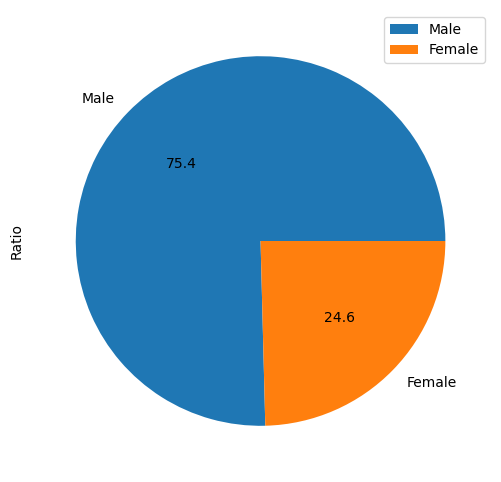

In [14]:
data.plot.pie(y='Ratio',figsize=(6,6),autopct="%.1f")

<Axes: title={'center': 'Gender Ratio'}>

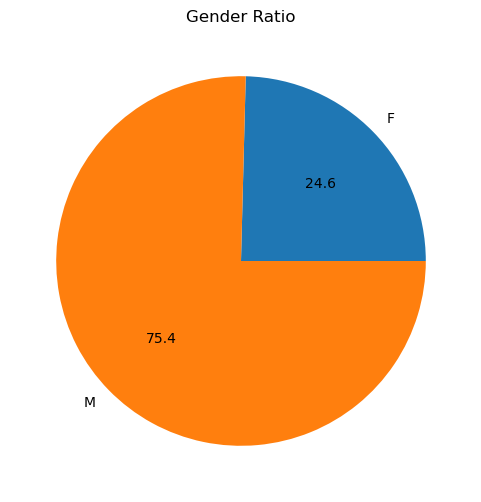

In [15]:
df.groupby("Gender").size().plot(kind='pie',autopct="%.1f",
                                title='Gender Ratio',figsize=(6,6))

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

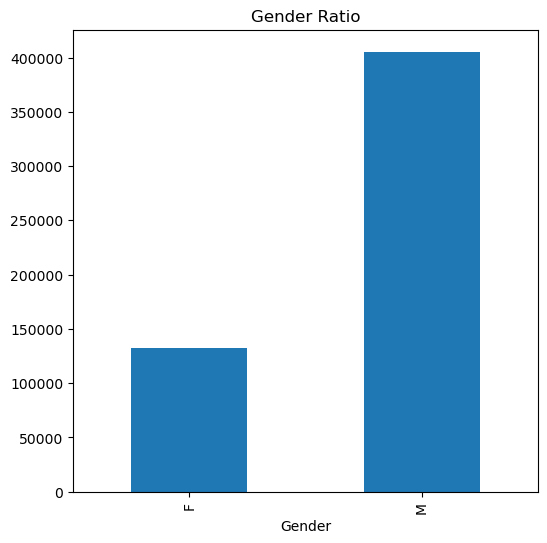

In [16]:
df.groupby("Gender").size().plot(kind='bar',
                                title='Gender Ratio',figsize=(6,6))

<Axes: title={'center': 'Purchase Distribution by Gender'}, ylabel='count'>

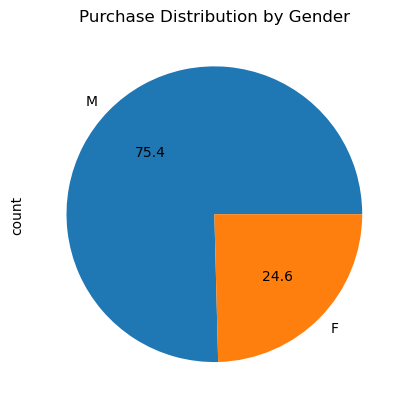

In [17]:
gender_counts = df['Gender'].value_counts()

gender_counts.plot(kind='pie', autopct='%.1f',title='Purchase Distribution by Gender')


## Analysing Age and Marital Status

<Axes: title={'center': 'Purchase Distribution by age'}, xlabel='Age'>

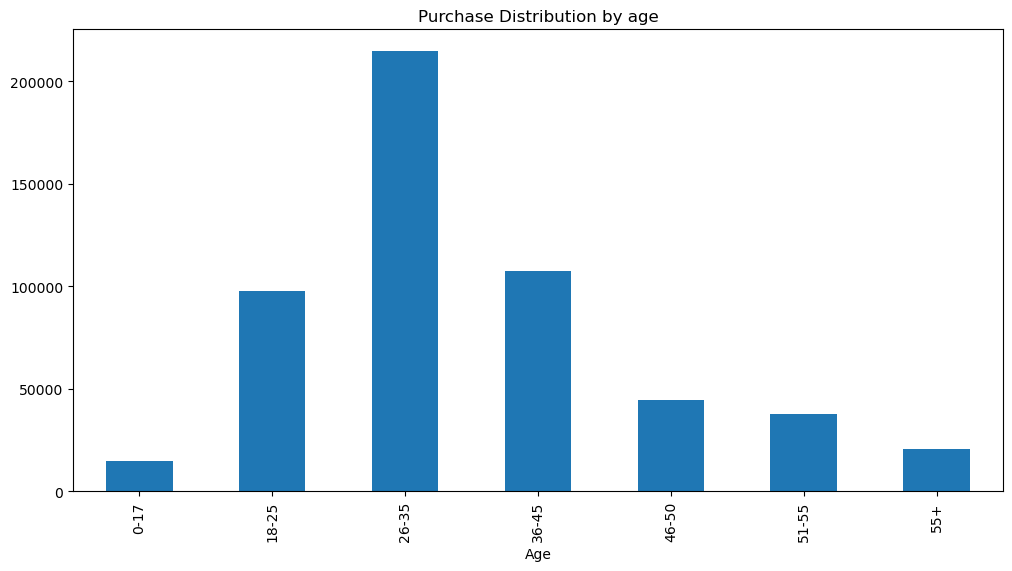

In [18]:
df.groupby('Age').size().plot(kind='bar',figsize=(12,6),title="Purchase Distribution by age")

In [19]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
    
    data=pd.DataFrame(lst, columns=['Age','Products'])

In [20]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

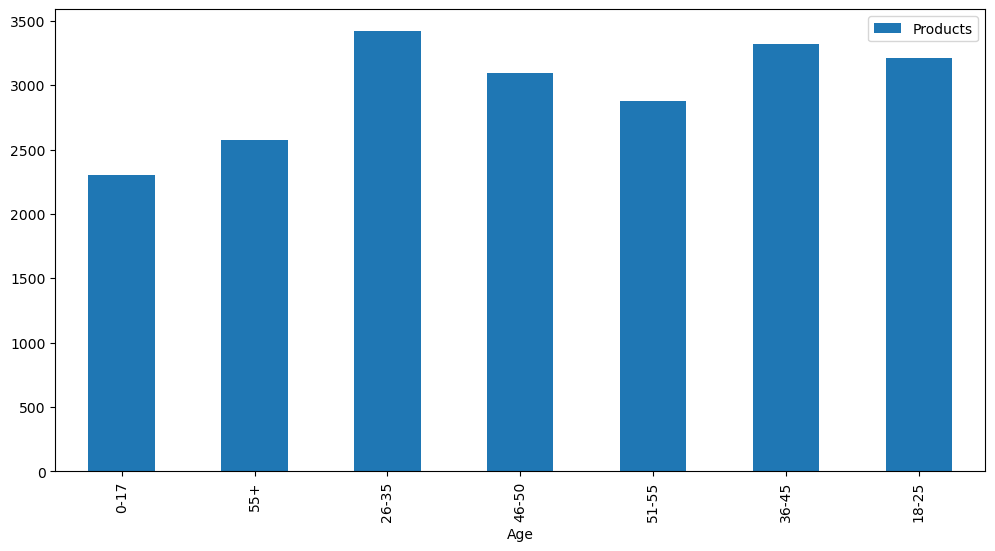

In [21]:
data.plot(kind='bar',x='Age',figsize=(12,6))

<Axes: >

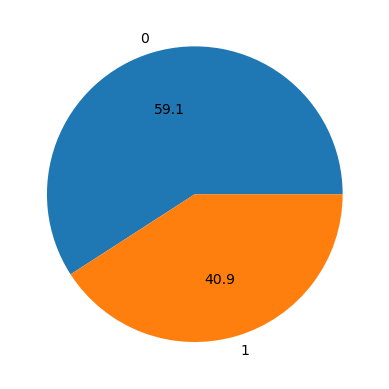

In [22]:
df.groupby('Marital_Status').size().plot(kind='pie',autopct='%.1f')

<Axes: >

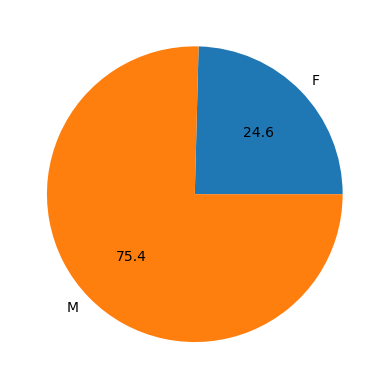

In [23]:
df.groupby('Gender').size().plot(kind='pie',autopct="%0.1f")

## Multicolumn Analysis

<Axes: xlabel='Age', ylabel='count'>

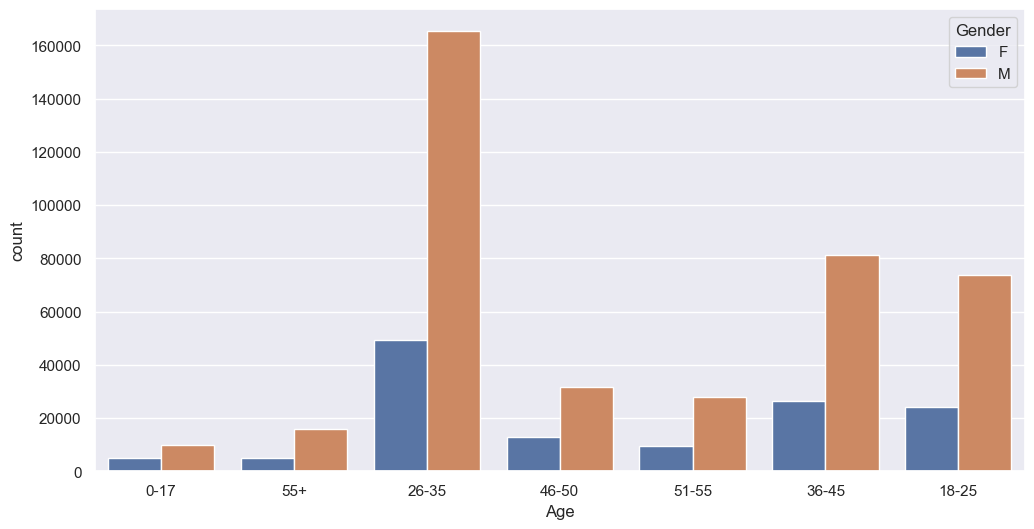

In [24]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Age',hue='Gender',data=df)

<Axes: xlabel='Gender', ylabel='count'>

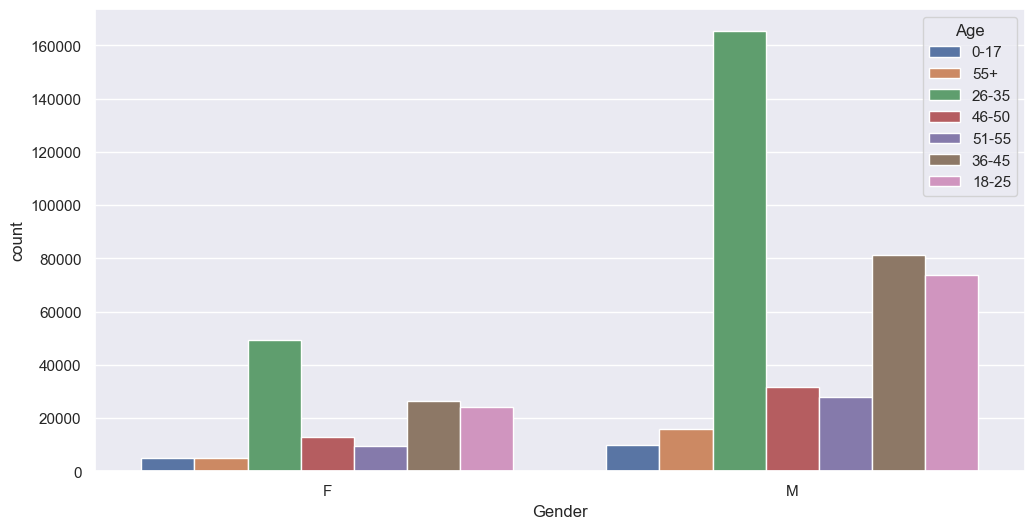

In [25]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Gender',hue='Age',data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

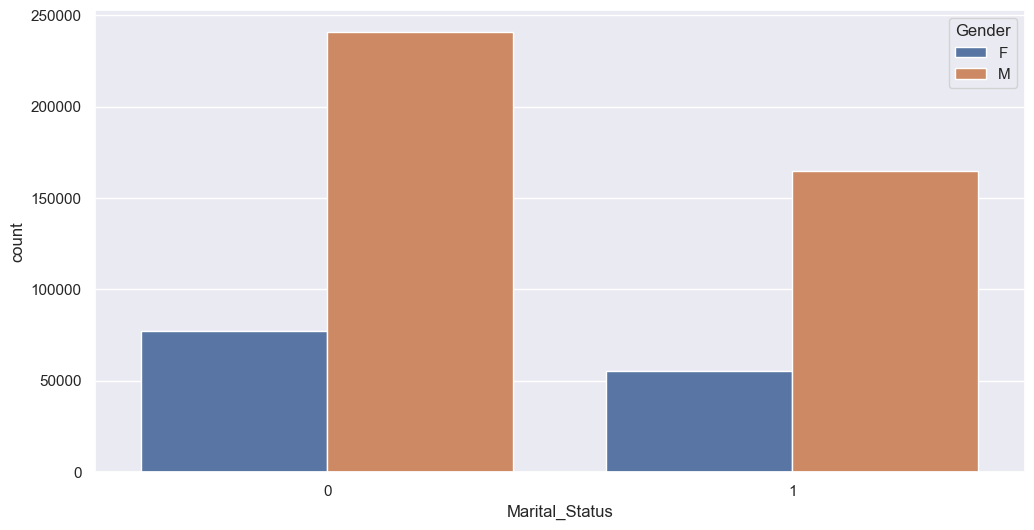

In [26]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Marital_Status",hue='Gender',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

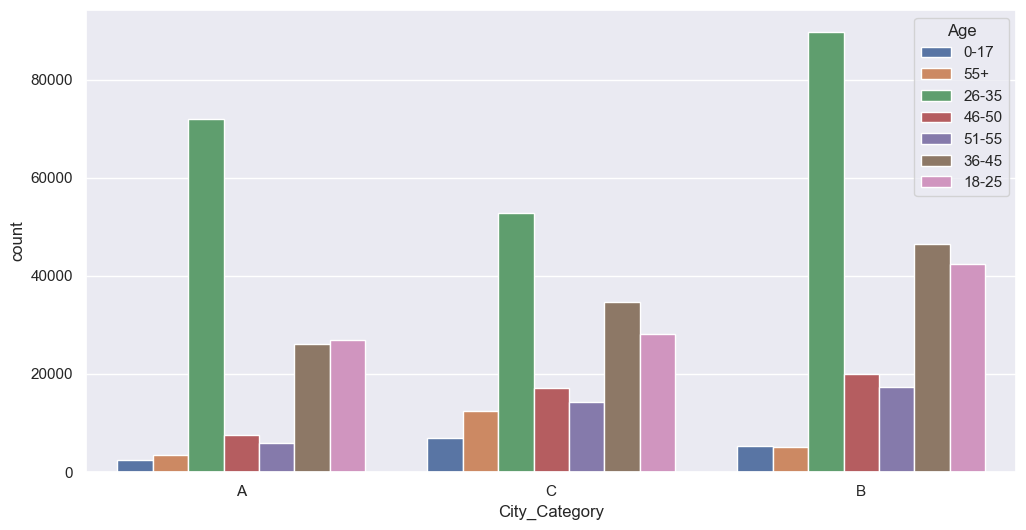

In [27]:
sns.countplot(x=df['City_Category'],hue='Age',data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

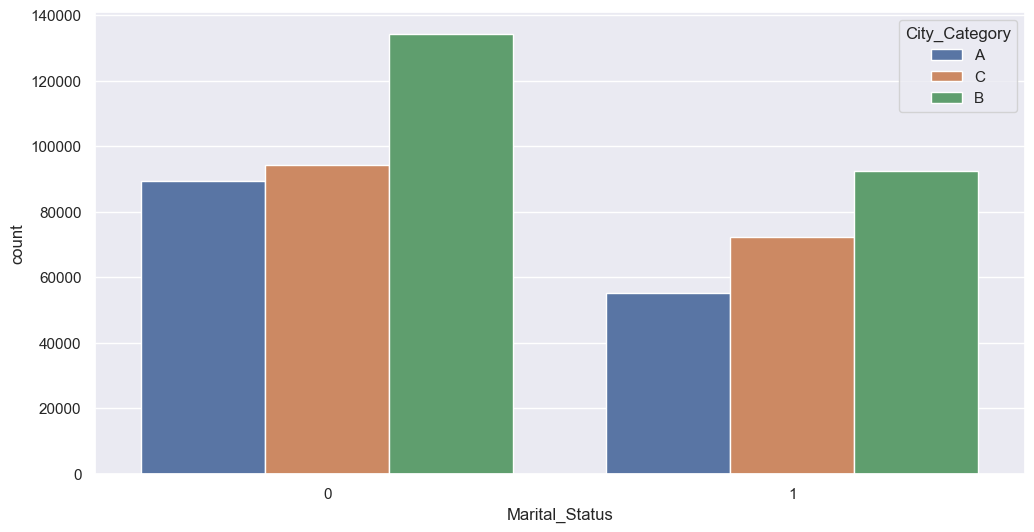

In [28]:
sns.countplot(x=df['Marital_Status'],hue='City_Category',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

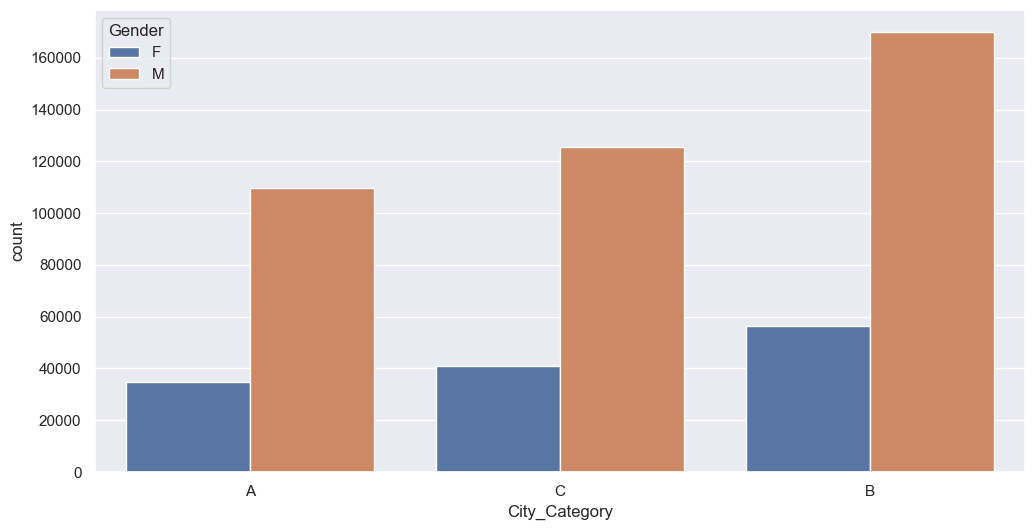

In [29]:
sns.countplot(x='City_Category',hue='Gender',data=df)

## Occupation and Product Analysis

In [30]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

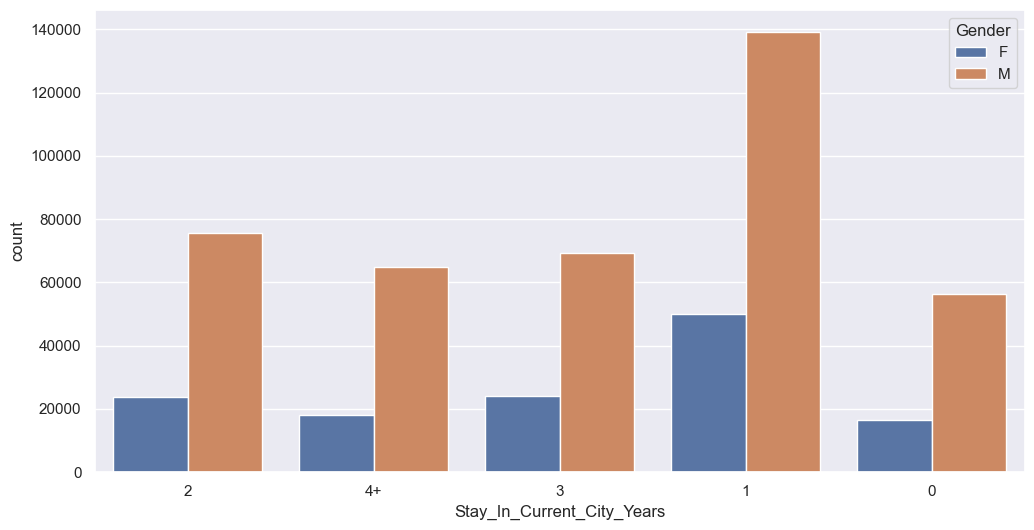

In [31]:
sns.countplot(x="Stay_In_Current_City_Years",hue='Gender',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

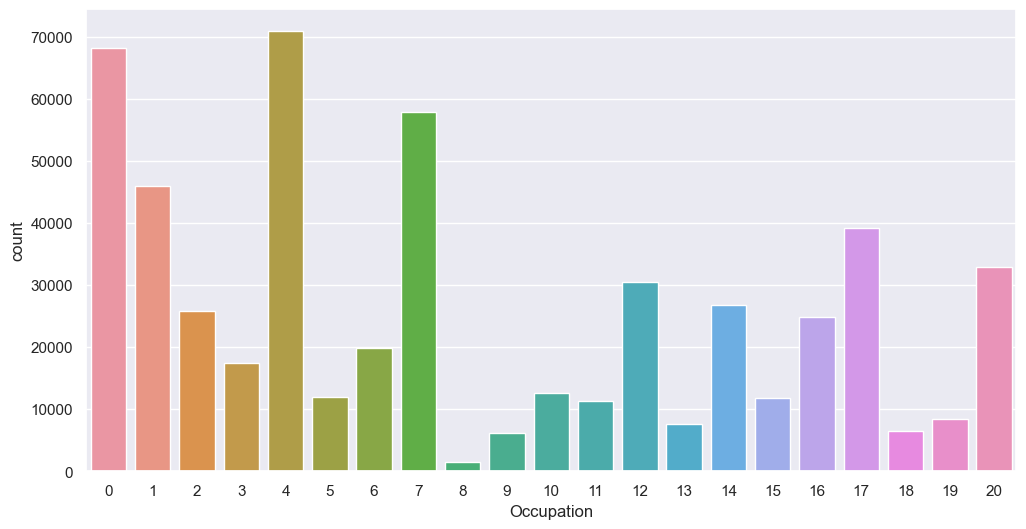

In [32]:
sns.countplot(x=df['Occupation'])

In [ ]:
sns.countplot(x='Occupation',hue='Gender',data=df)

## Combining Gender & Marital Status

In [ ]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i]+"_"+str(df["Marial_Status"][i]))
df['MaritalGender']=l    

In [ ]:
df.head()

In [ ]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])